## Cloning repository and installing libraries

In [ ]:
!git clone https://github.com/Ryzhtus/multilingual-bert-ner

Cloning into 'multilingual-bert-ner'...
remote: Enumerating objects: 116, done.
remote: Counting objects: 100% (116/116), done.
remote: Compressing objects: 100% (86/86), done.
remote: Total 116 (delta 60), reused 84 (delta 28), pack-reused 0
Receiving objects: 100% (116/116), 143.83 KiB | 17.98 MiB/s, done.
Resolving deltas: 100% (60/60), done.


In [ ]:
!pip install -q transformers
!pip install -q sentencepiece
!pip install -q seqeval

     |████████████████████████████████| 2.1MB 22.3MB/s 
     |████████████████████████████████| 901kB 54.0MB/s 
     |████████████████████████████████| 3.3MB 55.3MB/s 
     |████████████████████████████████| 1.2MB 20.4MB/s 
     |████████████████████████████████| 51kB 7.1MB/s 


## Downloading WikiAnn

In [ ]:
!wget https://www.dropbox.com/s/12h3qqog6q4bjve/panx_dataset.tar

--2021-04-21 09:26:43--  https://www.dropbox.com/s/12h3qqog6q4bjve/panx_dataset.tar
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/12h3qqog6q4bjve/panx_dataset.tar [following]
--2021-04-21 09:26:43--  https://www.dropbox.com/s/raw/12h3qqog6q4bjve/panx_dataset.tar
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc4aae414b38f1ac60cdc848c202.dl.dropboxusercontent.com/cd/0/inline/BNArFDDsWy5bZ0-GccFULLARmyrZKk6s2mjs-z9fXDkLiPr2Ljfw3MKOv-FklKvlVIHSoPDEX8pXXLLA3yTNxS8URHol-nq1lh8IZBdjqcxjE726msquf2jBNgbftJiQBSfGpKzaV9EwFmC9OCiKROQ4/file# [following]
--2021-04-21 09:26:44--  https://uc4aae414b38f1ac60cdc848c202.dl.dropboxusercontent.com/cd/0/inline/BNArFDDsWy5bZ0-GccFULLARmyrZKk6s2mjs-z9fXDkLiPr2Ljfw3MKOv-FklKvlVIHSoPDEX8pXXL

In [ ]:
!tar -xvf panx_dataset.tar

ace.tar.gz
af.tar.gz
als.tar.gz
am.tar.gz
an.tar.gz
ang.tar.gz
ar.tar.gz
arc.tar.gz
arz.tar.gz
as.tar.gz
ast.tar.gz
ay.tar.gz
az.tar.gz
ba.tar.gz
bar.tar.gz
bat-smg.tar.gz
be-x-old.tar.gz
be.tar.gz
bg.tar.gz
bh.tar.gz
bn.tar.gz
bo.tar.gz
br.tar.gz
bs.tar.gz
ca.tar.gz
cbk-zam.tar.gz
cdo.tar.gz
ce.tar.gz
ceb.tar.gz
ckb.tar.gz
co.tar.gz
crh.tar.gz
cs.tar.gz
csb.tar.gz
cv.tar.gz
cy.tar.gz
da.tar.gz
de.tar.gz
diq.tar.gz
dv.tar.gz
el.tar.gz
eml.tar.gz
en.tar.gz
eo.tar.gz
es.tar.gz
et.tar.gz
eu.tar.gz
ext.tar.gz
fa.tar.gz
fi.tar.gz
fiu-vro.tar.gz
fo.tar.gz
fr.tar.gz
frr.tar.gz
fur.tar.gz
fy.tar.gz
ga.tar.gz
gan.tar.gz
gd.tar.gz
gl.tar.gz
gn.tar.gz
gu.tar.gz
hak.tar.gz
he.tar.gz
hi.tar.gz
hr.tar.gz
hsb.tar.gz
hu.tar.gz
hy.tar.gz
ia.tar.gz
id.tar.gz
ig.tar.gz
ilo.tar.gz
io.tar.gz
is.tar.gz
it.tar.gz
ja.tar.gz
jbo.tar.gz
jv.tar.gz
ka.tar.gz
kk.tar.gz
km.tar.gz
kn.tar.gz
ko.tar.gz
ksh.tar.gz
ku.tar.gz
ky.tar.gz
la.tar.gz
lb.tar.gz
li.tar.gz
lij.tar.gz
lmo.tar.gz
ln.tar.gz
lt.tar.gz
lv.tar.gz
map-

In [ ]:
!mkdir lang_en
!tar -xvf en.tar.gz -C lang_en

!mkdir lang_ru
!tar -xvf ru.tar.gz -C lang_ru

!mkdir lang_es
!tar -xvf es.tar.gz -C lang_es

!mkdir lang_fr
!tar -xvf fr.tar.gz -C lang_fr

!mkdir lang_cs
!tar -xvf cs.tar.gz -C lang_cs

!mkdir lang_zh
!tar -xvf zh.tar.gz -C lang_zh

train
dev
test
train
dev
test
extra
train
dev
test
extra
train
dev
test
extra
train
dev
test
extra
train
dev
test


## Moving to working directory

In [ ]:
cd /content/multilingual-bert-ner/

/content/multilingual-bert-ner


## mBERT

In [ ]:
from multilingual_ner.mBERT.dataset import WikiAnnDataset, create_dataset_and_dataloader, read_data
from multilingual_ner.mBERT.train import train_model, test_epoch
from multilingual_ner.mBERT.model import BertNER

from transformers import BertTokenizer, BertModel

import torch 
import torch.nn as nn
import torch.optim as optim

import numpy 
import random
from tqdm import tqdm

SEED = 42
torch.manual_seed(SEED)
random.seed(SEED)
numpy.random.seed(SEED)

### French

In [ ]:
TOKENIZER = BertTokenizer.from_pretrained('bert-base-multilingual-cased', do_lower_case=False)
DEVICE = 'cuda' if torch.cuda.is_available else 'cpu'
EPOCHS = 4
BATCH_SIZE = 16

fr_train_dataset, fr_train_dataloader = create_dataset_and_dataloader('../lang_fr/train', BATCH_SIZE, TOKENIZER)
fr_eval_dataset, fr_eval_dataloader = create_dataset_and_dataloader('../lang_fr/dev', BATCH_SIZE, TOKENIZER)
fr_test_dataset, fr_test_dataloader = create_dataset_and_dataloader('../lang_fr/test', BATCH_SIZE, TOKENIZER)

In [ ]:
classes = len(fr_train_dataset.idx2tag)

device = 'cuda' if torch.cuda.is_available() else 'cpu'

FrenchBertModel = BertNER(classes, pretrained='bert-base-multilingual-cased').to(device)

optimizer = optim.AdamW(FrenchBertModel.parameters(), lr=2e-5)
criterion = nn.CrossEntropyLoss(ignore_index=0).to(device)

EPOCHS = 4

train_model(FrenchBertModel, criterion, optimizer, fr_train_dataloader, fr_eval_dataloader, fr_train_dataset.tag2idx, fr_train_dataset.idx2tag, device, None, EPOCHS)
test_epoch(FrenchBertModel, criterion, fr_test_dataloader, fr_train_dataset.tag2idx, fr_train_dataset.idx2tag, device)


Epoch 1 / 4
Train Loss = 0.26600, F1-score = 90.912%, Precision = 86.705%, Recall = 95.549%
Valid Loss = 6.55161, F1-score = 12.364%, Precision = 12.152%, Recall = 12.583%
Epoch 2 / 4
Train Loss = 0.14180, F1-score = 95.548%, Precision = 92.741%, Recall = 98.532%
Valid Loss = 6.84714, F1-score = 12.439%, Precision = 11.959%, Recall = 12.959%
Epoch 3 / 4


### Spanish

In [ ]:
TOKENIZER = BertTokenizer.from_pretrained('bert-base-multilingual-cased', do_lower_case=False)
DEVICE = 'cuda' if torch.cuda.is_available else 'cpu'
EPOCHS = 4
BATCH_SIZE = 16

es_train_dataset, es_train_dataloader = create_dataset_and_dataloader('../lang_es/train', BATCH_SIZE, TOKENIZER)
es_eval_dataset, es_eval_dataloader = create_dataset_and_dataloader('../lang_es/dev', BATCH_SIZE, TOKENIZER)
es_test_dataset, es_test_dataloader = create_dataset_and_dataloader('../lang_es/test', BATCH_SIZE, TOKENIZER)

In [ ]:
classes = len(es_train_dataset.idx2tag)

device = 'cuda' if torch.cuda.is_available() else 'cpu'

SpanishBertModel = BertNER(classes, pretrained='bert-base-multilingual-cased').to(device)

optimizer = optim.AdamW(SpanishBertModel.parameters(), lr=2e-5)
criterion = nn.CrossEntropyLoss(ignore_index=0).to(device)

EPOCHS = 4

train_model(SpanishBertModel, criterion, optimizer, es_train_dataloader, es_eval_dataloader, es_train_dataset.tag2idx, es_train_dataset.idx2tag, device, None, EPOCHS)
test_epoch(SpanishBertModel, criterion, es_test_dataloader, es_train_dataset.tag2idx, es_train_dataset.idx2tag, device)


Epoch 1 / 4
Train Loss = 0.22524, F1-score = 91.600%, Precision = 87.200%, Recall = 96.468%
Valid Loss = 1.78996, F1-score = 52.032%, Precision = 35.568%, Recall = 96.868%
Epoch 2 / 4
Train Loss = 0.12184, F1-score = 95.785%, Precision = 92.733%, Recall = 99.044%
Valid Loss = 2.03237, F1-score = 52.257%, Precision = 35.712%, Recall = 97.365%
Epoch 3 / 4
Train Loss = 0.08422, F1-score = 97.293%, Precision = 95.250%, Recall = 99.427%
Valid Loss = 2.08265, F1-score = 52.127%, Precision = 35.566%, Recall = 97.554%
Epoch 4 / 4


### English

In [ ]:
TOKENIZER = BertTokenizer.from_pretrained('bert-base-multilingual-cased', do_lower_case=False)
DEVICE = 'cuda' if torch.cuda.is_available else 'cpu'
EPOCHS = 4
BATCH_SIZE = 16

en_train_dataset, en_train_dataloader = create_dataset_and_dataloader('../lang_en/train', BATCH_SIZE, TOKENIZER)
en_eval_dataset, en_eval_dataloader = create_dataset_and_dataloader('../lang_en/dev', BATCH_SIZE, TOKENIZER)
en_test_dataset, en_test_dataloader = create_dataset_and_dataloader('../lang_en/test', BATCH_SIZE, TOKENIZER)

In [ ]:
# ids to drop because of the size of sentence's tokens, that doesn't fit into BERT's 512 bound 

ids_to_drop_train = [1721, 9967, 9966]

In [ ]:
for idx in ids_to_drop_train:
    en_train_dataset.sentences.pop(idx)
    en_train_dataset.sentences_tags.pop(idx)

In [ ]:
from torch.utils.data import DataLoader

en_train_dataloader = DataLoader(en_train_dataset, BATCH_SIZE, collate_fn=en_train_dataset.paddings)
en_eval_dataloader = DataLoader(en_eval_dataset, BATCH_SIZE, collate_fn=en_eval_dataset.paddings)
en_test_dataloader = DataLoader(en_test_dataset, BATCH_SIZE, collate_fn=en_test_dataset.paddings)

In [ ]:
classes = len(en_train_dataset.idx2tag)

device = 'cuda' if torch.cuda.is_available() else 'cpu'

EnglishBertModel = BertNER(classes, pretrained='bert-base-multilingual-cased').to(device)

optimizer = optim.AdamW(EnglishBertModel.parameters(), lr=2e-6)
criterion = nn.CrossEntropyLoss(ignore_index=0).to(device)

EPOCHS = 4

train_model(EnglishBertModel, criterion, optimizer, en_train_dataloader, en_eval_dataloader, en_train_dataset.tag2idx, en_train_dataset.idx2tag, device, None, EPOCHS)
test_epoch(EnglishBertModel, criterion, en_test_dataloader, en_train_dataset.tag2idx, en_train_dataset.idx2tag, device)

[Final] Test : Loss = 0.60306, F1-score = 80.18%: 100%|██████████| 625/625 [00:23<00:00, 26.31it/s]


### Russian

In [ ]:
TOKENIZER = BertTokenizer.from_pretrained('bert-base-multilingual-cased', do_lower_case=False)
DEVICE = 'cuda' if torch.cuda.is_available else 'cpu'
EPOCHS = 4
BATCH_SIZE = 16

ru_train_dataset, ru_train_dataloader = create_dataset_and_dataloader('../lang_ru/train', BATCH_SIZE, TOKENIZER)
ru_eval_dataset, ru_eval_dataloader = create_dataset_and_dataloader('../lang_ru/dev', BATCH_SIZE, TOKENIZER)
ru_test_dataset, ru_test_dataloader = create_dataset_and_dataloader('../lang_ru/test', BATCH_SIZE, TOKENIZER)

In [ ]:
ru_extra_sentences, ru_extra_tags = read_data('../lang_ru/extra')

from collections import Counter
import numpy as np

dataset_tags_length = {'I-PER': [], 'I-LOC': [], 'I-ORG': []}
PER_LOC = 0
PER_ORG = 0
LOC_ORG = 0
PER_LOC_ORG = 0
PER_ = 0
LOC_ = 0
ORG_ = 0
O_ = 0

PER_LOC_IDS = []
PER_ORG_IDS = []
LOC_ORG_IDS = []
PER_LOC_ORG_IDS = []
PER_IDS = []
ORG_IDS = []
LOC_IDS = []
O_IDS = []

for item in range(len(ru_extra_tags)):
    tags_counter = Counter()
    for tag in ru_extra_tags[item]:
        tags_counter[tag] += 1
    
    if tags_counter['I-PER'] > 0 and tags_counter['I-LOC'] > 0 and tags_counter['I-ORG'] > 0:
        PER_LOC_ORG += 1
        PER_LOC_ORG_IDS.append(item)

    if tags_counter['I-PER'] > 0 and tags_counter['I-LOC'] > 0 and tags_counter['I-ORG'] == 0:
        PER_LOC += 1
        PER_LOC_IDS.append(item)

    if tags_counter['I-PER'] > 0 and tags_counter['I-LOC'] == 0 and tags_counter['I-ORG'] > 0:
        PER_ORG += 1
        PER_ORG_IDS.append(item)
    
    if tags_counter['I-PER'] == 0 and tags_counter['I-LOC'] > 0 and tags_counter['I-ORG'] > 0:
        LOC_ORG += 1   
        LOC_ORG_IDS.append(item)

    if tags_counter['I-PER'] >= 2 and tags_counter['I-LOC'] == 0 and tags_counter['I-ORG'] == 0:
        PER_ += 1
        PER_IDS.append(item)

    if tags_counter['I-PER'] == 0 and tags_counter['I-LOC'] >= 2 and tags_counter['I-ORG'] == 0:
        LOC_ += 1
        LOC_IDS.append(item)

    if tags_counter['I-PER'] == 0 and tags_counter['I-LOC'] == 0 and tags_counter['I-ORG'] >= 2:
        ORG_ += 1
        ORG_IDS.append(item)
    
    if tags_counter['I-PER'] == 0 and tags_counter['I-LOC'] == 0 and tags_counter['I-ORG'] == 0:
        O_ += 1
        O_IDS.append(item)

    dataset_tags_length['I-PER'].append(tags_counter['I-PER'])
    dataset_tags_length['I-LOC'].append(tags_counter['I-LOC'])
    dataset_tags_length['I-ORG'].append(tags_counter['I-ORG'])

PER_FILTERED = np.array([value for value in dataset_tags_length['I-PER'] if value != 0])
LOC_FILTERED = np.array([value for value in dataset_tags_length['I-LOC'] if value != 0])
ORG_FILTERED = np.array([value for value in dataset_tags_length['I-ORG'] if value != 0])

PER = np.array(dataset_tags_length['I-PER'])
LOC = np.array(dataset_tags_length['I-LOC'])
ORG = np.array(dataset_tags_length['I-ORG'])

print('I-PER All I-Tags except 0:', PER_FILTERED.sum(), 'I-PER Length Median:', np.median(PER), 'I-PER Filtred Length Median:', np.median(PER_FILTERED))
print('I-LOC All I-Tags except 0:', LOC_FILTERED.sum(),'I-LOC Length Median:', np.median(LOC), 'I-LOC Filtred Length Median:', np.median(LOC_FILTERED))
print('I-ORG All I-Tags except 0:', ORG_FILTERED.sum(),'I-ORG Length Median:', np.median(ORG), 'I-ORG Filtred Length Median:', np.median(ORG_FILTERED))
print('Amount of Sentences PER:',  len(PER_FILTERED))
print('Amount of Sentences LOC:',  len(LOC_FILTERED))
print('Amount of Sentences ORG:',  len(ORG_FILTERED))
print('PER-LOC-ORG:', PER_LOC_ORG)
print('PER-LOC:', PER_LOC)
print('PER-ORG:', PER_ORG)
print('LOC-ORG:', LOC_ORG)
print('PER:', PER_)
print('LOC:', LOC_)
print('ORG:', ORG_)
print('O', O_)

I-PER All I-Tags except 0: 559319 I-PER Length Median: 0.0 I-PER Filtred Length Median: 2.0
I-LOC All I-Tags except 0: 227810 I-LOC Length Median: 0.0 I-LOC Filtred Length Median: 2.0
I-ORG All I-Tags except 0: 562644 I-ORG Length Median: 0.0 I-ORG Filtred Length Median: 2.0
Amount of Sentences PER: 243186
Amount of Sentences LOC: 103386
Amount of Sentences ORG: 199172
PER-LOC-ORG: 46
PER-LOC: 678
PER-ORG: 4087
LOC-ORG: 2073
PER: 204550
LOC: 59705
ORG: 141525
O 190350


In [ ]:
new_ru_train_sentences = []
new_ru_train_tags = []

for i in range(111):
    item = PER_LOC_IDS.pop(i)
    new_ru_train_sentences.append(ru_extra_sentences[item])
    new_ru_train_tags.append(ru_extra_tags[item])
    
for i in range(746):
    item = PER_ORG_IDS.pop(i)
    new_ru_train_sentences.append(ru_extra_sentences[item])
    new_ru_train_tags.append(ru_extra_tags[item])

for i in range(427):
    item = LOC_ORG_IDS.pop(i)
    new_ru_train_sentences.append(ru_extra_sentences[item])
    new_ru_train_tags.append(ru_extra_tags[item])

for i in range(15):
    item = PER_LOC_ORG_IDS.pop(i)
    new_ru_train_sentences.append(ru_extra_sentences[item])
    new_ru_train_tags.append(ru_extra_tags[item])

for item in range(0, 4000):
    new_ru_train_sentences.append(ru_extra_sentences[PER_IDS[item]])
    new_ru_train_tags.append(ru_extra_tags[PER_IDS[item]])
    new_ru_train_sentences.append(ru_extra_sentences[LOC_IDS[item]])
    new_ru_train_tags.append(ru_extra_tags[LOC_IDS[item]])
    new_ru_train_sentences.append(ru_extra_sentences[ORG_IDS[item]])
    new_ru_train_tags.append(ru_extra_tags[ORG_IDS[item]])
    new_ru_train_sentences.append(ru_extra_sentences[O_IDS[item]])
    new_ru_train_tags.append(ru_extra_tags[O_IDS[item]])
    PER_IDS.pop(item)
    ORG_IDS.pop(item)
    LOC_IDS.pop(item)
    O_IDS.pop(item)

In [ ]:
new_ru_eval_sentences = []
new_ru_eval_tags = []

for i in range(46):
    item = PER_LOC_IDS.pop(i)
    new_ru_eval_sentences.append(ru_extra_sentences[item])
    new_ru_eval_tags.append(ru_extra_tags[item])
    
for i in range(418):
    item = PER_ORG_IDS.pop(i)
    new_ru_eval_sentences.append(ru_extra_sentences[item])
    new_ru_eval_tags.append(ru_extra_tags[item])

for i in range(210):
    item = LOC_ORG_IDS.pop(i)
    new_ru_eval_sentences.append(ru_extra_sentences[item])
    new_ru_eval_tags.append(ru_extra_tags[item])

for i in range(11):
    item = PER_LOC_ORG_IDS.pop(i)
    new_ru_eval_sentences.append(ru_extra_sentences[item])
    new_ru_eval_tags.append(ru_extra_tags[item])

for item in range(0, 4300):
    new_ru_eval_sentences.append(ru_extra_sentences[PER_IDS[item]])
    new_ru_eval_tags.append(ru_extra_tags[PER_IDS[item]])
    new_ru_eval_sentences.append(ru_extra_sentences[LOC_IDS[item]])
    new_ru_eval_tags.append(ru_extra_tags[LOC_IDS[item]])
    new_ru_eval_sentences.append(ru_extra_sentences[ORG_IDS[item]])
    new_ru_eval_tags.append(ru_extra_tags[ORG_IDS[item]])
    new_ru_eval_sentences.append(ru_extra_sentences[O_IDS[item]])
    new_ru_eval_tags.append(ru_extra_tags[O_IDS[item]])
    PER_IDS.pop(item)
    ORG_IDS.pop(item)
    LOC_IDS.pop(item)
    O_IDS.pop(item)

In [ ]:
new_ru_test_sentences = []
new_ru_test_tags = []

for i in range(45):
    item = PER_LOC_IDS.pop(i)
    new_ru_test_sentences.append(ru_extra_sentences[item])
    new_ru_test_tags.append(ru_extra_tags[item])
    
for i in range(406):
    item = PER_ORG_IDS.pop(i)
    new_ru_test_sentences.append(ru_extra_sentences[item])
    new_ru_test_tags.append(ru_extra_tags[item])

for i in range(245):
    item = LOC_ORG_IDS.pop(i)
    new_ru_test_sentences.append(ru_extra_sentences[item])
    new_ru_test_tags.append(ru_extra_tags[item])

for i in range(8):
    item = PER_LOC_ORG_IDS.pop(i)
    new_ru_test_sentences.append(ru_extra_sentences[item])
    new_ru_test_tags.append(ru_extra_tags[item])

for item in range(0, 4300):
    new_ru_test_sentences.append(ru_extra_sentences[PER_IDS[item]])
    new_ru_test_tags.append(ru_extra_tags[PER_IDS[item]])
    new_ru_test_sentences.append(ru_extra_sentences[LOC_IDS[item]])
    new_ru_test_tags.append(ru_extra_tags[LOC_IDS[item]])
    new_ru_test_sentences.append(ru_extra_sentences[ORG_IDS[item]])
    new_ru_test_tags.append(ru_extra_tags[ORG_IDS[item]])
    new_ru_test_sentences.append(ru_extra_sentences[O_IDS[item]])
    new_ru_test_tags.append(ru_extra_tags[O_IDS[item]])
    PER_IDS.pop(item)
    ORG_IDS.pop(item)
    LOC_IDS.pop(item)
    O_IDS.pop(item)

In [ ]:
from torch.utils.data import DataLoader

ru_train_extra_dataset = WikiAnnDataset(new_ru_train_sentences, new_ru_train_tags, TOKENIZER)
ru_eval_extra_dataset = WikiAnnDataset(new_ru_eval_sentences, new_ru_eval_tags, TOKENIZER)
ru_test_extra_dataset = WikiAnnDataset(new_ru_test_sentences, new_ru_test_tags, TOKENIZER)
ru_train_extra_dataloader = DataLoader(ru_train_extra_dataset, BATCH_SIZE, collate_fn=ru_train_extra_dataset.paddings)
ru_eval_extra_dataloader = DataLoader(ru_eval_extra_dataset, BATCH_SIZE, collate_fn=ru_train_extra_dataset.paddings)
ru_test_extra_dataloader = DataLoader(ru_test_extra_dataset, BATCH_SIZE, collate_fn=ru_train_extra_dataset.paddings)

In [ ]:
classes = len(ru_train_dataset.idx2tag)

device = 'cuda' if torch.cuda.is_available() else 'cpu'

RussianBertModel = BertNER(classes, pretrained='bert-base-multilingual-cased').to(device)

optimizer = optim.AdamW(RussianBertModel.parameters(), lr=2e-5)
criterion = nn.CrossEntropyLoss(ignore_index=0).to(device)

EPOCHS = 4

train_model(RussianBertModel, criterion, optimizer, ru_train_extra_dataloader, ru_eval_extra_dataloader, ru_train_extra_dataset.tag2idx, ru_train_extra_dataset.idx2tag, device, None, EPOCHS)
test_epoch(RussianBertModel, criterion, ru_test_extra_dataloader, ru_train_extra_dataset.tag2idx, ru_train_extra_dataset.idx2tag, device)

[Final] Test : Loss = 0.25038, F1-score = 94.24%: 100%|██████████| 1119/1119 [00:49<00:00, 22.74it/s]


### Czech

In [ ]:
TOKENIZER = BertTokenizer.from_pretrained('bert-base-multilingual-cased', do_lower_case=False)
DEVICE = 'cuda' if torch.cuda.is_available else 'cpu'
EPOCHS = 4
BATCH_SIZE = 16

cs_train_dataset, cs_train_dataloader = create_dataset_and_dataloader('../lang_cs/train', BATCH_SIZE, TOKENIZER)
cs_eval_dataset, cs_eval_dataloader = create_dataset_and_dataloader('../lang_cs/dev', BATCH_SIZE, TOKENIZER)
cs_test_dataset, cs_test_dataloader = create_dataset_and_dataloader('../lang_cs/test', BATCH_SIZE, TOKENIZER)

In [ ]:
classes = len(cs_train_dataset.idx2tag)

device = 'cuda' if torch.cuda.is_available() else 'cpu'

CzechBertModel = BertNER(classes, pretrained='bert-base-multilingual-cased').to(device)

optimizer = optim.AdamW(CzechBertModel.parameters(), lr=2e-6)
criterion = nn.CrossEntropyLoss(ignore_index=0).to(device)

EPOCHS = 4

train_model(CzechBertModel, criterion, optimizer, cs_train_dataloader, cs_eval_dataloader, cs_train_dataset.tag2idx, cs_train_dataset.idx2tag, device, None, EPOCHS)
test_epoch(CzechBertModel, criterion, cs_test_dataloader, cs_train_dataset.tag2idx, cs_train_dataset.idx2tag, device)

[Final] Test : Loss = 0.13556, F1-score = 94.78%: 100%|██████████| 625/625 [00:28<00:00, 21.63it/s]


### Simplified Chinese

In [ ]:
TOKENIZER = BertTokenizer.from_pretrained('bert-base-multilingual-cased', do_lower_case=False)
DEVICE = 'cuda' if torch.cuda.is_available else 'cpu'
EPOCHS = 4
BATCH_SIZE = 8

zh_train_dataset, _ = create_dataset_and_dataloader('../lang_zh/train', BATCH_SIZE, TOKENIZER)
zh_eval_dataset, _ = create_dataset_and_dataloader('../lang_zh/dev', BATCH_SIZE, TOKENIZER)
zh_test_dataset, _ = create_dataset_and_dataloader('../lang_zh/test', BATCH_SIZE, TOKENIZER)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
max_idx = 0
max_length = 512

for idx, (sentence, tags) in enumerate(zip(zh_eval_dataset.sentences, zh_eval_dataset.sentences_tags)):
    if len(sentence) > max_length:
        print('Words:', zh_train_dataset.sentences[idx])
        print('Tags :', zh_train_dataset.sentences_tags[idx])
        print('Len  :', len(sentence))
        print('ID   :', idx)
        print('-' * 10)

Words: ['#', 'd', 'o', '#', 'i', 't', '#', 'a', 'g', 'a', 'i', 'n']
Tags : ['O', 'B-ORG', 'I-ORG', 'O', 'I-ORG', 'I-ORG', 'O', 'I-ORG', 'I-ORG', 'I-ORG', 'I-ORG', 'I-ORG']
Len  : 528
ID   : 2578
----------
Words: ['#', '5', 'p', 'b', '.']
Tags : ['O', 'B-ORG', 'I-ORG', 'I-ORG', 'I-ORG']
Len  : 732
ID   : 4594
----------


In [ ]:
# ids to drop because of the size of sentence's tokens, that doesn't fit into BERT's 512 bound 

ids_to_drop_train = [6538]
ids_to_drop_eval  = [2578, 4593, 4594]
ids_to_drop_test  = [8655]

In [ ]:
for idx in ids_to_drop_train:
    zh_train_dataset.sentences.pop(idx)
    zh_train_dataset.sentences_tags.pop(idx)

for idx in ids_to_drop_eval:
    zh_eval_dataset.sentences.pop(idx)
    zh_eval_dataset.sentences_tags.pop(idx)

for idx in ids_to_drop_test:
    zh_test_dataset.sentences.pop(idx)
    zh_test_dataset.sentences_tags.pop(idx)

In [ ]:
print('Train:', zh_train_dataset.entities_statistics())
print('Eval :', zh_eval_dataset.entities_statistics())
print('Test :', zh_test_dataset.entities_statistics())

Train: Counter({'O': 310504, 'LOC': 8572, 'PER': 7878, 'ORG': 7684})
Eval : Counter({'O': 157331, 'LOC': 4214, 'ORG': 3948, 'PER': 3843})
Test : Counter({'O': 152285, 'LOC': 4371, 'PER': 3899, 'ORG': 3778})


## Testing on WikiMatrix

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

mode_visualization = ['layer2head', 'layer2word', 'head2word', 'word2word', 'all']

class VisAttention:
    def __init__(self, tokens, ids, model, drop_special_tokens=True,
                 mode_visualization='layer2head', fine_tuned=True, save_result=False):
        self.tok = tokens
        self.sample = ids
        with torch.no_grad():
            if fine_tuned:
                _, output = model(self.sample)
            else:
                output = model(self.sample)

        self.attention = output['attentions']
        self.save_result = save_result
        self.mode_visualization = mode_visualization

        if drop_special_tokens:
            self.attention = [attn[:, :, 1:-1, 1:-1] for attn in self.attention]
            self.tok = self.tok[1:-1]
        
        self.attention = torch.stack([attn.squeeze(0) for attn in self.attention])
        self.cmap = plt.cm.BuPu
    
    def layer2head(self):        
        att_map = [torch.max(torch.flatten(att, start_dim=-2), dim=-1).values for att in self.attention]
        att_map = torch.stack([att.T for att in att_map], dim=0)

        plt.figure(figsize=(10, 7))
        sns.heatmap(att_map.detach().to('cpu').numpy(), cmap=self.cmap)
    
    def layer2word(self, position):
        attention_avg = self._other2word(position, 1)
        plt.figure(figsize=(10, 7))
        ax = sns.heatmap(attention_avg.detach().to('cpu').numpy(), xticklabels= self.tok, cmap=self.cmap)
        ax.set(xlabel='words', ylabel='Layer')
        plt.show()
    
    def head2word(self, position):
        attention_avg = self._other2word(position, 0)
        plt.figure(figsize=(10, 7))
        ax = sns.heatmap(attention_avg.detach().to('cpu').numpy(), xticklabels= self.tok, cmap=self.cmap)
        ax.set(xlabel='words', ylabel='Head')
        plt.show()
    
    def _other2word(self, position, dim):
        attention = self.attention.permute(2,1,0,3)
        attention_position = attention[position]
        attention_avg = attention_position.mean(dim=dim)
        return attention_avg
    
    def word2word(self):
        attns = self.attention.permute(2,3,0,1)

        att_map = [torch.max(torch.flatten(att, start_dim=-2), dim=-1).values for att in attns]
        att_map = torch.stack([att.T for att in att_map], dim=0)

        plt.figure(figsize=(10, 7))
        sns.heatmap(att_map.detach().to('cpu').numpy(),
                    xticklabels= self.tok, yticklabels= self.tok,
                    cmap=self.cmap)
    
    def word2word_position(self, position_layer=-1, position_head=-1):
        attn = self.attention[position_layer, position_head]

        plt.figure(figsize=(10, 7))
        sns.heatmap(attn.detach().to('cpu').numpy(),
                    xticklabels= self.tok, yticklabels= self.tok,
                    cmap=self.cmap)

### Russian - English

In [ ]:
!wget -O en-ru.tsv.gz https://dl.fbaipublicfiles.com/laser/WikiMatrix/v1/WikiMatrix.en-ru.tsv.gz

--2021-04-21 10:24:01--  https://dl.fbaipublicfiles.com/laser/WikiMatrix/v1/WikiMatrix.en-ru.tsv.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.22.75.142, 104.22.74.142, 172.67.9.4, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.22.75.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 658252364 (628M) [application/gzip]
Saving to: ‘en-ru.tsv.gz’

en-ru.tsv.gz        100%[===================>] 627.76M  23.8MB/s    in 28s     

2021-04-21 10:24:30 (22.6 MB/s) - ‘en-ru.tsv.gz’ saved [658252364/658252364]



In [ ]:
!python3 /content/multilingual-bert-ner/extract.py \
  --tsv en-ru.tsv.gz \
  --bitext WikiMatrix.en-ru.txt \
  --src-lang en --trg-lang ru \
  --threshold 1.05

Tool to extract bitext from the WikiMatrix
Processing en-ru.tsv.gz
 - wrote 1159158 lines
 - with 23693136 source and 20799384 target words
 - last threshold is 1.0500


In [ ]:
def markup_sentences(model, idx2tag, sentences):
    markup = []
    
    for sentence in sentences:
        words = TOKENIZER.tokenize(sentence)
        tokens = torch.LongTensor(TOKENIZER.convert_tokens_to_ids(words))
        preds = model(tokens.unsqueeze(0).to(DEVICE))
        preds = preds.view(-1, preds.shape[-1])
        preds = preds.argmax(1)
        preds = preds.cpu().numpy()
        preds = [idx2tag[tag] for tag in preds]
        markup.append(preds)
    
    return markup

In [ ]:
en_sentences = []
ru_sentences = []

with open("/content/multilingual-bert-ner/WikiMatrix.en-ru.txt.en") as file:
    for line in file:
        en_sentences.append(line)

with open("/content/multilingual-bert-ner/WikiMatrix.en-ru.txt.ru") as file:
    for line in file:
        ru_sentences.append(line)

print('RU:', len(ru_sentences), 'EN:', len(en_sentences))

RU: 1159158 EN: 1159158


In [ ]:
ru_sentences_id = []

ru_sentences_new = []
en_sentences_new = []

for idx in range(len(ru_sentences)):
    if len(ru_sentences[idx]) <= 200 and len(ru_sentences[idx]) >= 190:
        ru_sentences_id.append(idx)

for idx in ru_sentences_id:
    ru_sentences_new.append(ru_sentences[idx])
    en_sentences_new.append(en_sentences[idx])
                            
print('RU:', len(ru_sentences_new), 'EN:', len(en_sentences_new))

RU: 32802 EN: 32802


In [ ]:
TOKENIZER = BertTokenizer.from_pretrained('bert-base-multilingual-cased', do_lower_case=False)
DEVICE = 'cuda' if torch.cuda.is_available else 'cpu'
bert = BertModel.from_pretrained('bert-base-multilingual-cased', output_attentions=True)
bert.to(DEVICE)

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(119547, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
         

In [ ]:
def convert_tokens(sentence):
    markup = []
    
    words = ['[CLS]'] + TOKENIZER.tokenize(sentence) + ['[SEP]']
    tokens = torch.LongTensor(TOKENIZER.convert_tokens_to_ids(words))
    
    return words, tokens.unsqueeze(0).to(DEVICE)

In [ ]:
en_tokens, en_ids = convert_tokens(en_sentences_new[0])

In [ ]:
ru_tokens, ru_ids = convert_tokens(ru_sentences_new[0])

In [ ]:
# s - means simple
s_en_viz_ru = VisAttention(ru_tokens, ru_ids, bert, fine_tuned=False)
s_ru_viz_en = VisAttention(en_tokens, en_ids, bert, fine_tuned=False)
s_en_viz_en = VisAttention(en_tokens, en_ids, bert, fine_tuned=False)
s_ru_viz_ru = VisAttention(ru_tokens, ru_ids, bert, fine_tuned=False)

In [ ]:
en_viz_ru = VisAttention(ru_tokens, ru_ids, EnglishBertModel, fine_tuned=True)
ru_viz_en = VisAttention(en_tokens, en_ids, RussianBertModel, fine_tuned=True)
en_viz_en = VisAttention(en_tokens, en_ids, EnglishBertModel, fine_tuned=True)
ru_viz_ru = VisAttention(ru_tokens, ru_ids, RussianBertModel, fine_tuned=True)

## EN -> RU

### Word2Word

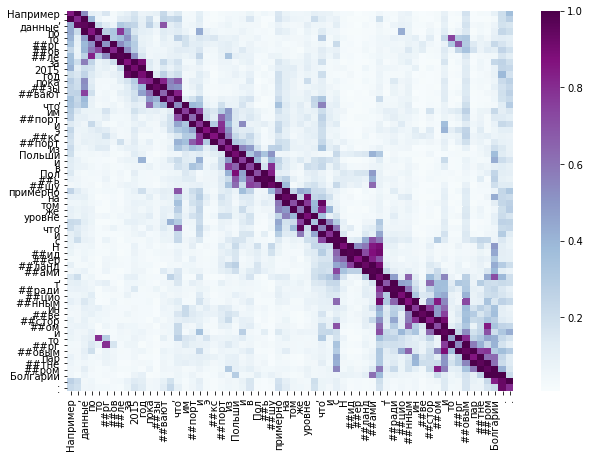

In [ ]:
en_viz_ru.word2word()

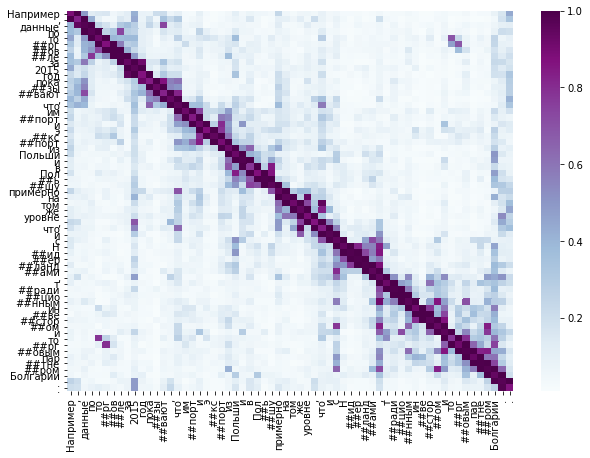

In [ ]:
s_en_viz_ru.word2word()

### Layer2Head

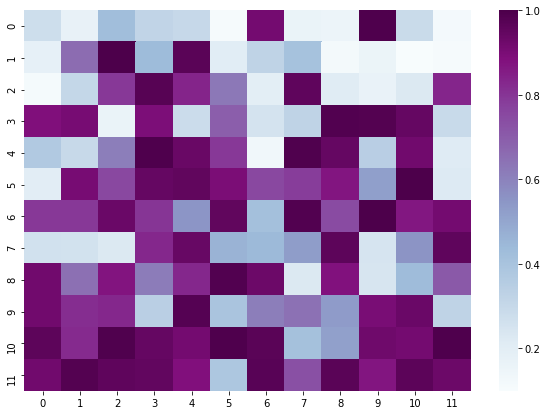

In [ ]:
en_viz_ru.layer2head()

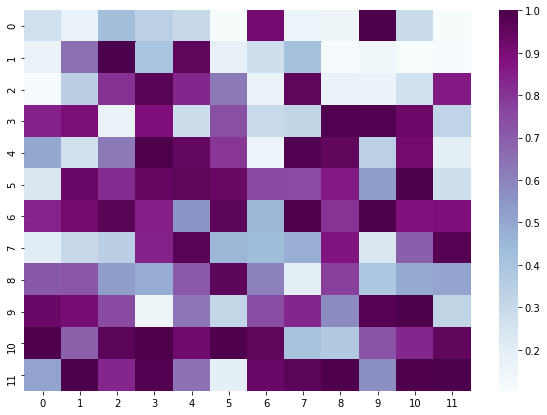

In [ ]:
s_en_viz_ru.layer2head()

# EN -> EN

### Word2Word

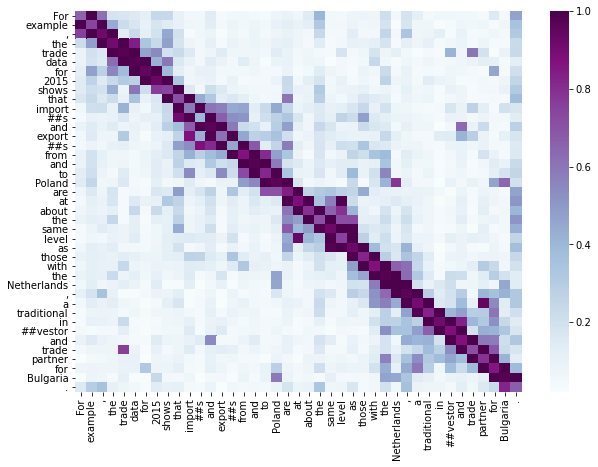

In [ ]:
en_viz_en.word2word()

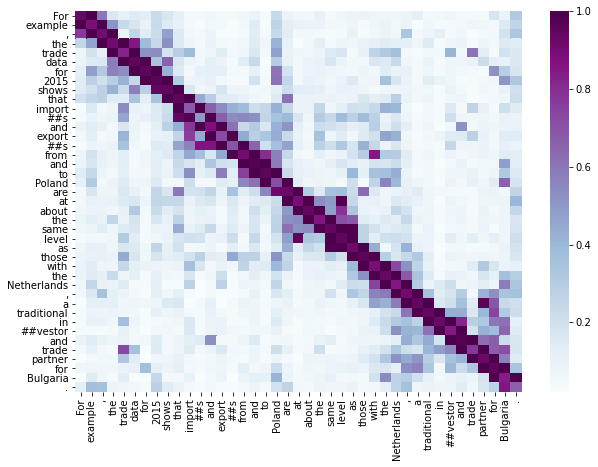

In [ ]:
s_en_viz_en.word2word()

### Layer2Head

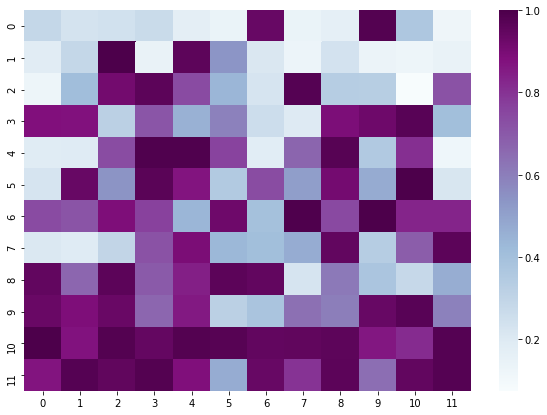

In [ ]:
en_viz_en.layer2head()

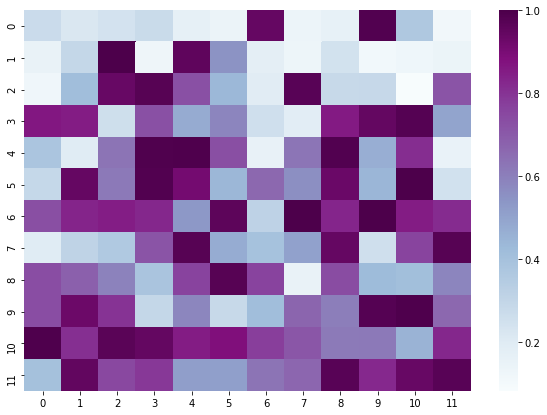

In [ ]:
s_en_viz_en.layer2head()

# RU -> EN

### Word2Word

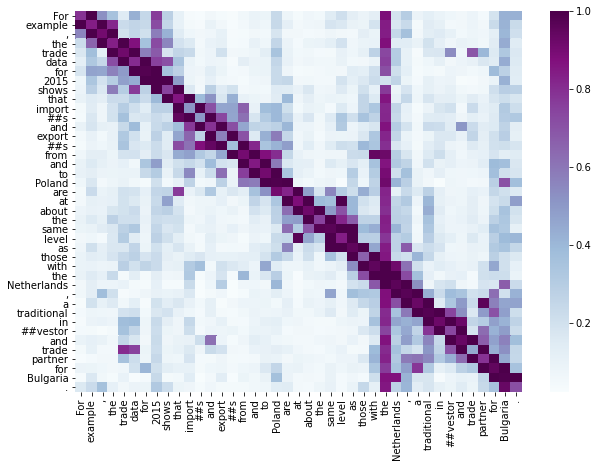

In [ ]:
ru_viz_en.word2word()

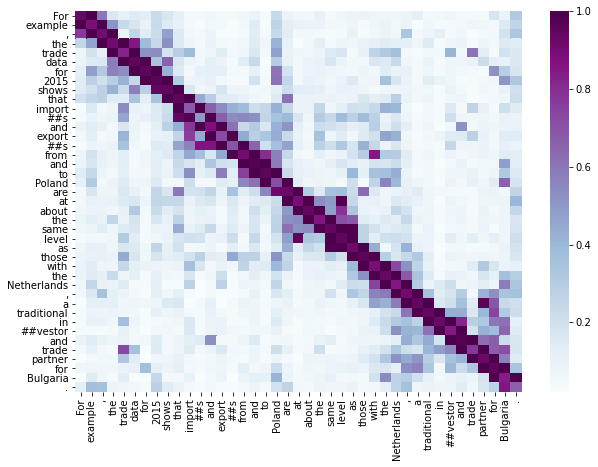

In [ ]:
s_ru_viz_en.word2word()

### Layer2Head

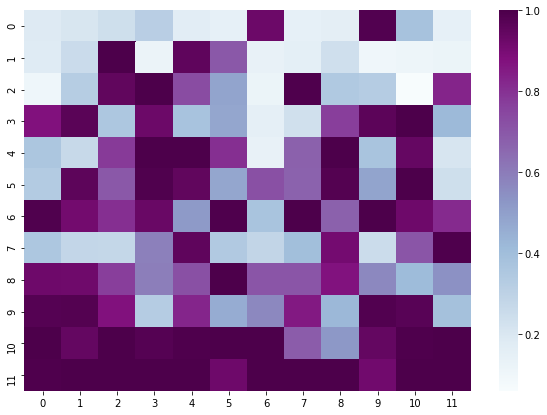

In [ ]:
ru_viz_en.layer2head()

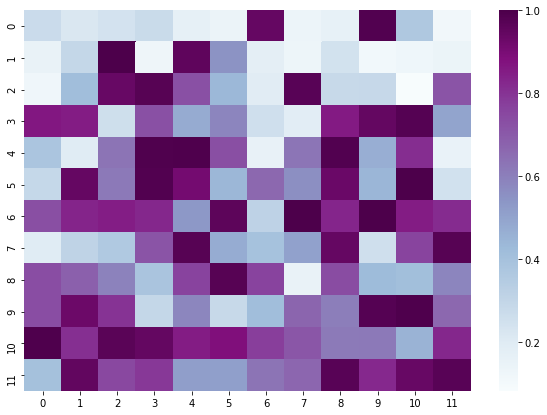

In [ ]:
s_ru_viz_en.layer2head()

# RU -> RU

### Word2Word

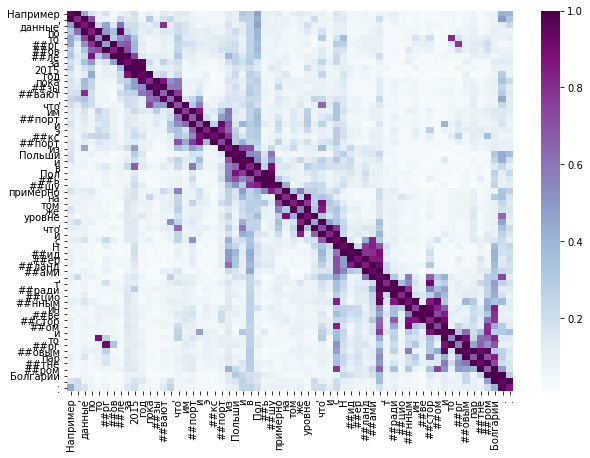

In [ ]:
ru_viz_ru.word2word()

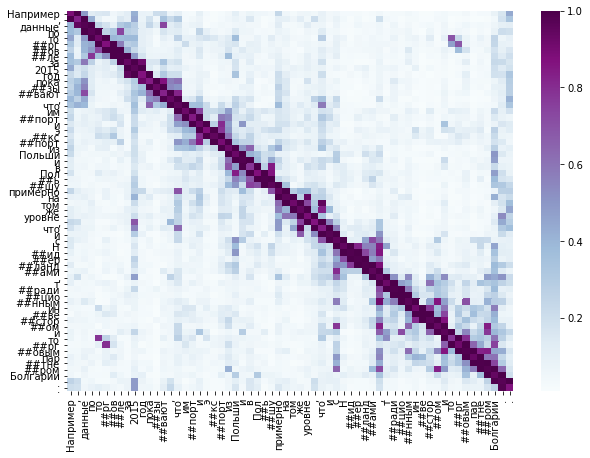

In [ ]:
s_ru_viz_ru.word2word()

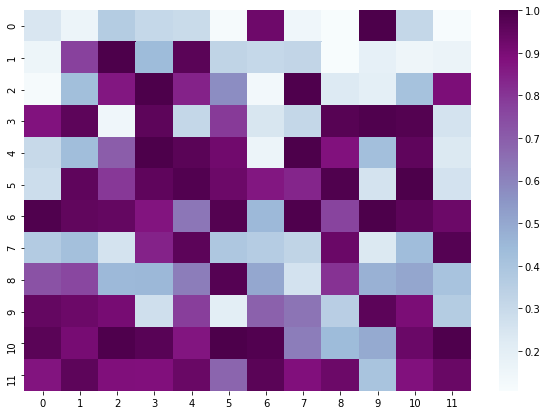

In [ ]:
ru_viz_ru.layer2head()

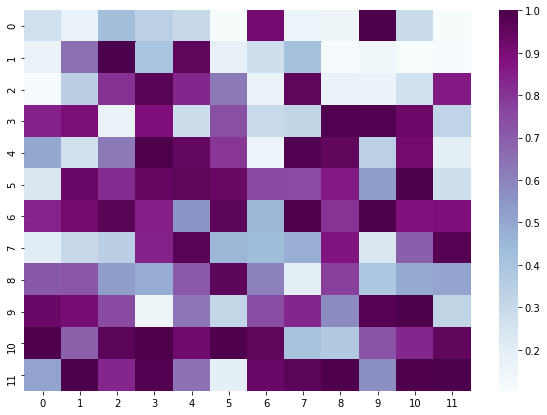

In [ ]:
s_ru_viz_ru.layer2head()

### Layer2Head

In [ ]:
english_markup_EnBERT = markup_sentences(EnglishBertModel, en_train_dataset.idx2tag, en_sentences_new)  
english_markup_RuBERT = markup_sentences(RussianBertModel, ru_train_dataset.idx2tag, en_sentences_new)

from seqeval.metrics import f1_score
print('Russian BERT on English Texts:', f1_score(english_markup_EnBERT, english_markup_RuBERT))

Russian BERT on English Texts: 0.5073159677589502


In [ ]:
russian_markup_EnBERT = markup_sentences(EnglishBertModel, en_train_dataset.idx2tag, ru_sentences_new)  
russian_markup_RuBERT = markup_sentences(RussianBertModel, ru_train_dataset.idx2tag, ru_sentences_new)

from seqeval.metrics import f1_score
print('English BERT on Russian Texts:', f1_score(russian_markup_RuBERT, russian_markup_EnBERT))

English BERT on Russian Texts: 0.5162010934335202


In [ ]:
english_markup_EnXLM = markup_sentences(EnglishXLMModel, en_train_dataset.idx2tag, en_sentences_new)  
english_markup_RuXLM = markup_sentences(RussianXLMModel, ru_train_dataset.idx2tag, en_sentences_new)

from seqeval.metrics import f1_score
print('Russian XLM on English Texts:', f1_score(english_markup_EnXLM, english_markup_RuXLM))

Russian XLM on English Texts: 0.5796063017494121


In [ ]:
russian_markup_EnXLM = markup_sentences(EnglishXLMModel, en_train_dataset.idx2tag, ru_sentences_new)  
russian_markup_RuXLM = markup_sentences(RussianXLMModel, ru_train_dataset.idx2tag, ru_sentences_new)

from seqeval.metrics import f1_score
print('English XLM on Russian Texts:', f1_score(russian_markup_RuXLM, russian_markup_EnXLM))

English XLM on Russian Texts: 0.586135823776363
